# Lab 4

Integrantes
- Antonia Labarca
- Felipe Urrutia

## Ejercicio 1

In [1]:
import numpy as np

C:\Users\felip\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Y1 = 1
Y2 = 2
c = 1
T = 10
p01 = 1
p02 = 1

In [3]:
A_hat = np.array([
    [0,1,1,0],
    [-1,0,0,0],
    [0,0,0,1],
    [0,0,-1,0]
])
r_hat = np.array([
    -Y2,
    Y1,
    0,
    0
])
X0 = np.array([
    Y1,
    Y2+c,
    p01,
    p02
])
A_hat @ X0

array([ 4, -1,  1, -1])

In [4]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from numpy import linalg as LA

In [72]:
def solve_pontryagin(Y1, Y2, c, T, p0=[1, 1]):
    A_hat = np.array([
        [0,1,1,0],
        [-1,0,0,0],
        [0,0,0,1],
        [0,0,-1,0]
    ])
    r_hat = np.array([
        -Y2,
        Y1,
        0,
        0
    ])
    def obj(p, Y1, Y2, c, T, A_hat, r_hat):
        p01, p02 = p[0], p[1]
        X0 = np.array([Y1, Y2+c, p01, p02])
        sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, t_span=[0, T], y0=X0)
        p_T = sol_X.y[2:, -1]
        y1_T = sol_X.y[0, -1] 
        ref_p_T = np.array([-y1_T, 0])
        return 0.5*((p_T[0]-ref_p_T[0])**2+(p_T[1]-ref_p_T[1])**2)

    opt_p0 = minimize(
        obj, 
        x0=np.array([p0[0], p0[1]]), 
        args=(Y1, Y2, c, T, A_hat, r_hat)).x
    p01, p02 = opt_p0
    print(p01, p02)
    sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, 
                      t_span=[0, T], 
                      y0=np.array([Y1, Y2+c, p01, p02]), 
                      dense_output=True)
    return sol_X.sol

In [6]:
from matplotlib import pyplot as plt

In [73]:
def plot_p1(sol, T):
    fig, ax = plt.subplots(1, 2, figsize=(5*2, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    p1 = [x[2] for x in X]
    p2 = [x[3] for x in X]
    ax[0].plot(y1, y2)
    ax[0].set_title("Solución")
    ax[0].set_xlabel("y1")
    ax[0].set_ylabel("y2")
    ax[1].plot(p1, p2);
    ax[1].set_title("Adjunto")
    ax[1].set_xlabel("p1")
    ax[1].set_ylabel("p2");
    pass

-101.85824286822496 -151.82484677541945
Wall time: 275 ms


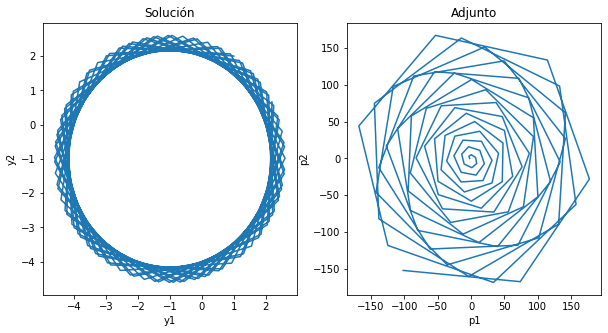

In [77]:
%%time
T=100
sol = solve_pontryagin(Y1=1, Y2=1, c=1, T=T, p0=[1, 1])
plot_p1(sol, T)

-102.17904204477796 -202.3581537842119
Wall time: 300 ms


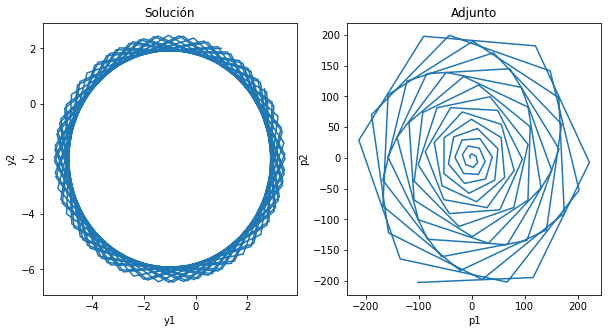

In [78]:
%%time
T=100
sol = solve_pontryagin(Y1=1, Y2=2, c=0, T=T, p0=[1, 1])
plot_p1(sol, T)

-1009.608754053568 -103.30846007377284
Wall time: 2.34 s


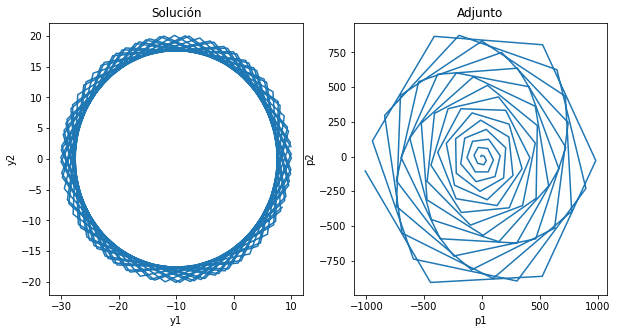

In [79]:
%%time
T=100
sol = solve_pontryagin(Y1=10, Y2=0, c=2, T=T, p0=[1, 1])
plot_p1(sol, T)

## Ejercicio 2

In [11]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from control import *

In [80]:
Y1, Y2 = [10, 10]
c=2

Q = np.array([[1, 0],
              [0, 0]])

U = np.array(1)

A = np.array([[ 0, 1],
              [-1, 0]])

B = np.array([[-1],
              [0]])

K, S, E = lqr(A, B, Q, U)
K

array([[-1.00000000e+00, -4.31775426e-16]])

In [81]:
def fun(t, X, A, B, u):
    dx = A@X + B*u
    return dx[0]

B.T[0]*K

array([[ 1., -0.]])

In [83]:
x0 = np.array([Y1, Y2+c])
sol = scipy.integrate.solve_ivp(fun, [0,10],x0, t_eval=np.linspace(0,10, 1000), args=(A, B.T[0], K))
sol;

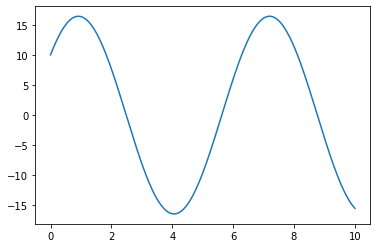

In [84]:
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.show()

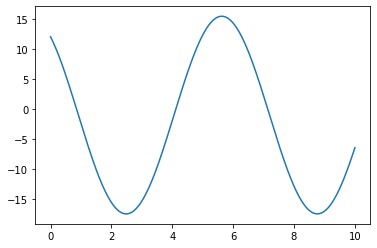

In [85]:
plt.figure()
plt.plot(sol.t, sol.y[1])
plt.show()

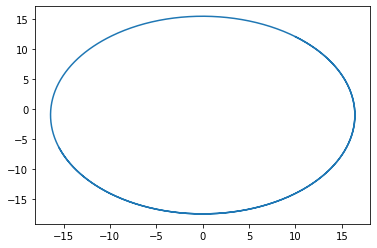

In [86]:
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.show()

## Ejercicio 3

$$
\dot{E}(t) = W(t)-A(t)^TE(t) - E(t)^TA(t)-E(t)^TB(t)U(t)^{-1}B(t)^T E(t)
$$
$$
E(T) = -Q
$$
$$
u(t) = U(t)^{-1} B(t)^T E(t)x(t), t \in [0,T]
$$

In [94]:
%%time
A = np.array([
    [0, 1],
    [-1, 0]
])
B = np.array([
    [-1], 
    [0]
])
U = np.array([1])
Q = np.array([
    [1,0],
    [0,0]
])
W = np.zeros((2, 2))

def solve_ricatti(Y1, Y2, c, T):
    def dynamic_E(t, F):
            E = np.array([
                [F[0], F[1]],
                [F[2], F[3]]
            ])
            dE = -(W - A.T@E - E.T@A - E.T@B@B.T@E) # tiempo inverso
            return np.array([dE[0,0],dE[0,1],dE[1,0],dE[1,1]]) 

    opt_E0 = -np.array([Q[0, 0], Q[0, 1], Q[1, 0], Q[1, 1]])
    sol_E = solve_ivp(dynamic_E, t_span=[0,T], y0=opt_E0, max_step=0.1, dense_output=True)
    
    print(sol_E.sol(0))
    
    def dynamic_ric(t, x):
        Et = sol_E.sol(T-t)
        Et = np.array([
            [Et[0], Et[1]],
            [Et[2], Et[3]]
        ])
        dx = A@x + B@(B.T@Et@x)
        return dx
    x0 = np.array([
        Y1,
        Y2+c
    ])
    sol_ric = solve_ivp(dynamic_ric, t_span=[0,T], y0=x0, max_step=0.1, dense_output=True)
    print(sol_ric.sol(T))
    return sol_ric.sol

Wall time: 0 ns


In [95]:
def plot_p3(sol, T):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    ax.plot(y1, y2)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    pass

[-1.  0.  0.  0.]
[-0.00296192  2.23056049]
Wall time: 520 ms


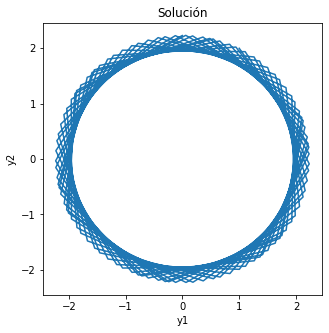

In [98]:
%%time
T=100
sol = solve_ricatti(Y1=1, Y2=1, c=1, T=T)
plot_p3(sol, T)

[-1.  0.  0.  0.]
[-0.00296192  2.23056049]
Wall time: 510 ms


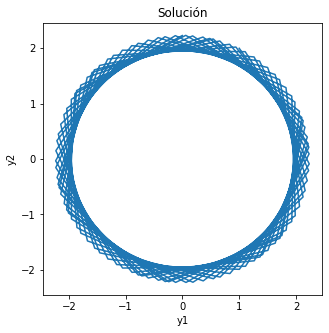

In [100]:
%%time
T=100
sol = solve_ricatti(Y1=1, Y2=2, c=0, T=T)
plot_p3(sol, T)

[-1.  0.  0.  0.]
[0.14986685 6.80730989]
Wall time: 510 ms


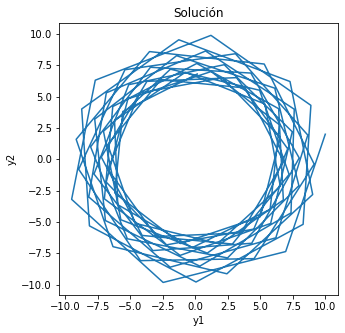

In [103]:
%%time
T=100
sol = solve_ricatti(Y1=10, Y2=0, c=2, T=T)
plot_p3(sol, T)

## Ejercicio 4

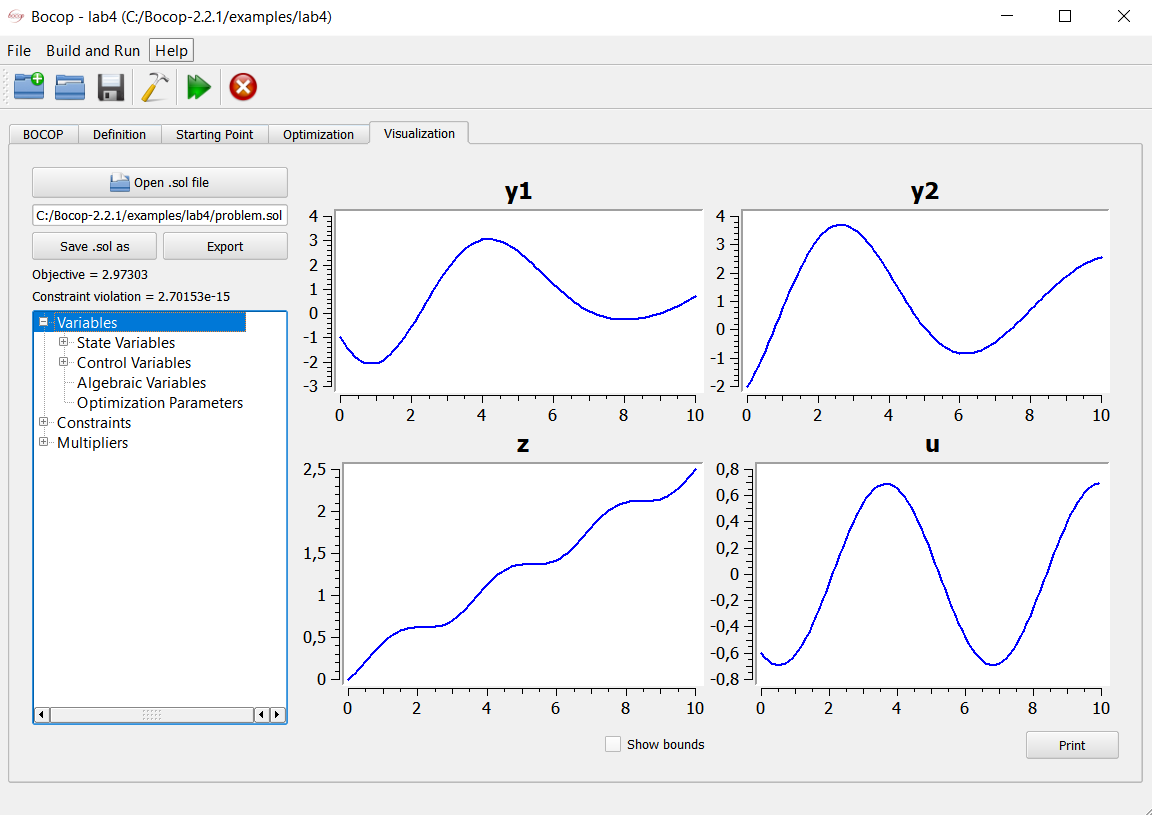
parametros: Y1=1, Y2=1, c=1

## Ejercicio 5